In [1]:
#Script Python para Análise Exploratória dos Dados
#Autor: Lucas Lai Barbosa

#Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
#Carregamento da base extraída via SQL
SQL = pd.read_excel('BASES_ORIGINAIS.xlsx', sheet_name='SQL')
SQL.head(5)

,ID_PRODUTO,DEPARTAMENTO,MATERIAL_SEGMENTO,MATERIAL_SUBSEGMENTO,MATERIAL_GRUPO,MATERIAL_SUBGRUPO,MATERIAL_COR,MATERIAL_MARCA,ID_LOJA,CIDADE,UF,Temp_loja,Cluster_low_high,TEMPO_EM_LOJA,PRECO_UNIT,QTD_PRODUTOS_VENDIDOS,VALOR_TOTAL_VENDIDO
0,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,OURO,TERCEIRO,1004,CUIABÁ,MT,Quente,Low,33,19.88,19,377.81
1,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,OURO,TERCEIRO,1024,CUIABÁ,MT,Quente,High,37,19.73,19,375.05
2,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,OURO,TERCEIRO,1027,VÁRZEA GRANDE,MT,Quente,Low,32,19.72,23,453.77
3,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,OURO,TERCEIRO,1029,CAMPO GRANDE,MS,Quente,High,36,19.59,10,195.90
4,5054397004,CHINELO,FEMININO,FEMININO,FEMININO,CHL FEMININO,OURO,TERCEIRO,1031,CUIABÁ,MT,Quente,Low,96,19.99,25,499.75


In [3]:
SQL.shape

(114830, 17)

In [4]:
#Carregamento da tabela de classificação dos produtos
MAT = pd.read_excel('BASES_ORIGINAIS.xlsx', sheet_name='DE-PARA-MATERIAL')
MAT.head(5)

,MATERIAL_SUBGRUPO,Tipo,Subtipo,Genero,Idade
0,CHL FEMININO,CHINELO,CASUAL,FEMININO,ADULTO
1,CHL MNA INF,CHINELO,CASUAL,FEMININO,INFANTIL
2,CHL MNO PP,CHINELO,CASUAL,MASCULINO,INFANTIL
3,CHL MNO INF,CHINELO,CASUAL,MASCULINO,INFANTIL
4,CHL MNA PP,CHINELO,CASUAL,FEMININO,INFANTIL


In [5]:
MAT.shape

(54, 5)

In [6]:
#Carregamento da tabela com as informações das lojas
LJS = pd.read_excel('BASES_ORIGINAIS.xlsx', sheet_name='INFO_LOJAS')
LJS.head(5)

,ID_LOJA,AREA,INAUG,REGIAO,UF,CIDADE,POPULACAO,Rua/Shopping,CLUSTER,TAMANHO_PE
0,1052,898,2005-11-01,Centro-Oeste,MT,CUIABÁ,623614,Shopping,A,GRANDE
1,1104,1364,2014-11-26,Norte,AM,MANAUS,2255903,Shopping,A,PEQUENO
2,1143,1053,2018-06-07,Norte,AM,MANAUS,2255903,Rua,A,PEQUENO
3,1126,918,2016-06-03,Norte,AM,MANAUS,2255903,Shopping,A,PEQUENO
4,1114,1077,2015-07-22,Norte,RR,BOA VISTA,436591,Shopping,A,PEQUENO


In [7]:
LJS.shape

(104, 10)

In [8]:
#Carregamento da tabela com a conversão das cores para HSB
COR = pd.read_excel('BASES_ORIGINAIS.xlsx', sheet_name='DE-PARA-CORES')
COR.head(5)

,MATERIAL_COR,COR_H,COR_S,COR_B
0,OURO,51.0,1.00,1.00
1,ROSA,350.0,0.25,1.00
2,AZUL,240.0,1.00,1.00
3,BEGE,60.0,0.10,0.96
4,VERMELHO,0.0,1.00,1.00


In [9]:
COR.shape

(29, 4)

In [10]:
#Junção das quatro bases em um único dataset
SQL_MAT = pd.merge(SQL, MAT, how='left', on=['MATERIAL_SUBGRUPO'])
SQL_MAT_LJS = pd.merge(SQL_MAT, LJS, how='left', on=['ID_LOJA']).drop(columns=['UF_y', 'CIDADE_y'])
SQL_MAT_LJS.rename(columns = {'CIDADE_x':'CIDADE', 'UF_x':'UF'}, inplace = True)
SQL_MAT_LJS_COR= pd.merge(SQL_MAT_LJS, COR, how='left', on=['MATERIAL_COR'])

#Conversão da data de inauguração da loja em 'Anos desde Inauguração'
SQL_MAT_LJS_COR['ANOS_DESDE_INAUG'] = \
        ((datetime.datetime.now() - SQL_MAT_LJS_COR['INAUG']).dt.days/365.25).apply(np.floor)
SQL_MAT_LJS_COR.drop(columns=['INAUG'], inplace=True)

#Reordenação das colunas
cols = ['ID_PRODUTO','DEPARTAMENTO','MATERIAL_SEGMENTO','MATERIAL_SUBSEGMENTO','MATERIAL_GRUPO',\
        'MATERIAL_SUBGRUPO','Tipo','Subtipo','Genero','Idade','MATERIAL_COR','COR_H','COR_S','COR_B',\
        'MATERIAL_MARCA','ID_LOJA','CIDADE','UF','REGIAO','POPULACAO','ANOS_DESDE_INAUG','AREA',\
        'Rua/Shopping','CLUSTER','TAMANHO_PE','Temp_loja','Cluster_low_high','TEMPO_EM_LOJA',\
        'PRECO_UNIT','QTD_PRODUTOS_VENDIDOS','VALOR_TOTAL_VENDIDO']
df = SQL_MAT_LJS_COR[cols]

#Confererência de valores nulos
df.isnull().sum()

ID_PRODUTO                  0
DEPARTAMENTO                0
MATERIAL_SEGMENTO           0
MATERIAL_SUBSEGMENTO        0
MATERIAL_GRUPO              0
MATERIAL_SUBGRUPO           0
Tipo                        0
Subtipo                     0
Genero                      0
Idade                       0
MATERIAL_COR                0
COR_H                    1515
COR_S                    1515
COR_B                    1515
MATERIAL_MARCA              0
ID_LOJA                     0
CIDADE                      0
UF                          0
REGIAO                      0
POPULACAO                   0
ANOS_DESDE_INAUG            0
AREA                        0
Rua/Shopping                0
CLUSTER                     0
TAMANHO_PE                  0
Temp_loja                   0
Cluster_low_high            0
TEMPO_EM_LOJA               0
PRECO_UNIT                  0
QTD_PRODUTOS_VENDIDOS       0
VALOR_TOTAL_VENDIDO         0
dtype: int64

In [11]:
#Inspeção dos valores nulos
df[pd.isnull(df).any(axis=1)]

,ID_PRODUTO,DEPARTAMENTO,MATERIAL_SEGMENTO,MATERIAL_SUBSEGMENTO,MATERIAL_GRUPO,MATERIAL_SUBGRUPO,Tipo,Subtipo,Genero,Idade,MATERIAL_COR,COR_H,COR_S,COR_B,MATERIAL_MARCA,ID_LOJA,CIDADE,UF,REGIAO,POPULACAO,ANOS_DESDE_INAUG,AREA,Rua/Shopping,CLUSTER,TAMANHO_PE,Temp_loja,Cluster_low_high,TEMPO_EM_LOJA,PRECO_UNIT,QTD_PRODUTOS_VENDIDOS,VALOR_TOTAL_VENDIDO
37621,5155764034,FEMININO ABERTO,ABERTO,SANDALIA,RASTEIRA,FEM SND RASTEIRA,SANDALIA,RASTEIRO,FEMININO,ADULTO,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1027,VÁRZEA GRANDE,MT,Centro-Oeste,290383,11.0,1713,Rua,A,GRANDE,Quente,Low,279,67.29,10,672.90
37622,5155764034,FEMININO ABERTO,ABERTO,SANDALIA,RASTEIRA,FEM SND RASTEIRA,SANDALIA,RASTEIRO,FEMININO,ADULTO,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1030,RONDONÓPOLIS,MT,Centro-Oeste,239613,20.0,1751,Rua,A,GRANDE,Quente,Low,326,61.75,13,802.87
37623,5155764034,FEMININO ABERTO,ABERTO,SANDALIA,RASTEIRA,FEM SND RASTEIRA,SANDALIA,RASTEIRO,FEMININO,ADULTO,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1032,CUIABÁ,MT,Centro-Oeste,623614,21.0,1448,Rua,A,GRANDE,Quente,Low,316,65.71,11,722.89
37624,5155764034,FEMININO ABERTO,ABERTO,SANDALIA,RASTEIRA,FEM SND RASTEIRA,SANDALIA,RASTEIRO,FEMININO,ADULTO,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1183,RECIFE,PE,Nordeste,1661017,0.0,1120,Shopping,B,GRANDE,Quente,High,276,64.19,10,641.90
37625,5155764034,FEMININO ABERTO,ABERTO,SANDALIA,RASTEIRA,FEM SND RASTEIRA,SANDALIA,RASTEIRO,FEMININO,ADULTO,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1157,JOÃO PESSOA,PB,Nordeste,825796,2.0,1347,Shopping,A,GRANDE,Quente,High,292,66.91,13,869.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92965,5162770033,INFANTIL,MENINA,INFANTIL,TENIS,INF MNA INF TENIS,TENIS,CASUAL,FEMININO,INFANTIL,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1104,MANAUS,AM,Norte,2255903,7.0,1364,Shopping,A,PEQUENO,Quente,High,227,58.25,15,873.86
92966,5162770033,INFANTIL,MENINA,INFANTIL,TENIS,INF MNA INF TENIS,TENIS,CASUAL,FEMININO,INFANTIL,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1098,ITAJAÍ,SC,Sul,226617,9.0,1417,Shopping,A,GRANDE,Fria,High,187,58.59,11,644.51
92967,5162770033,INFANTIL,MENINA,INFANTIL,TENIS,INF MNA INF TENIS,TENIS,CASUAL,FEMININO,INFANTIL,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1087,BLUMENAU,SC,Sul,366418,11.0,1197,Shopping,A,GRANDE,Fria,High,290,59.99,17,1019.83
92968,5162770033,INFANTIL,MENINA,INFANTIL,TENIS,INF MNA INF TENIS,TENIS,CASUAL,FEMININO,INFANTIL,MULTICOLOR,NaN,NaN,NaN,PROPRIA,1096,CRICIUMA,SC,Sul,219393,8.0,1307,Rua,C,GRANDE,Fria,High,175,59.17,11,650.90


In [12]:
#Substituição dos valores nulos pela média
df_na = df.copy()
df_na['COR_H'].fillna(df['COR_H'].mean(), inplace=True)
df_na['COR_S'].fillna(df['COR_S'].mean(), inplace=True)
df_na['COR_B'].fillna(df['COR_B'].mean(), inplace=True)
df_na.isnull().sum()

ID_PRODUTO               0
DEPARTAMENTO             0
MATERIAL_SEGMENTO        0
MATERIAL_SUBSEGMENTO     0
MATERIAL_GRUPO           0
MATERIAL_SUBGRUPO        0
Tipo                     0
Subtipo                  0
Genero                   0
Idade                    0
MATERIAL_COR             0
COR_H                    0
COR_S                    0
COR_B                    0
MATERIAL_MARCA           0
ID_LOJA                  0
CIDADE                   0
UF                       0
REGIAO                   0
POPULACAO                0
ANOS_DESDE_INAUG         0
AREA                     0
Rua/Shopping             0
CLUSTER                  0
TAMANHO_PE               0
Temp_loja                0
Cluster_low_high         0
TEMPO_EM_LOJA            0
PRECO_UNIT               0
QTD_PRODUTOS_VENDIDOS    0
VALOR_TOTAL_VENDIDO      0
dtype: int64

In [13]:
#Conferência das colunas
print(df_na.info())

#Gravação do dataset em um arquivo CSV
df_na.to_csv('CSV_PRODUTOS_LOJAS.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114830 entries, 0 to 114829
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_PRODUTO             114830 non-null  int64  
 1   DEPARTAMENTO           114830 non-null  object 
 2   MATERIAL_SEGMENTO      114830 non-null  object 
 3   MATERIAL_SUBSEGMENTO   114830 non-null  object 
 4   MATERIAL_GRUPO         114830 non-null  object 
 5   MATERIAL_SUBGRUPO      114830 non-null  object 
 6   Tipo                   114830 non-null  object 
 7   Subtipo                114830 non-null  object 
 8   Genero                 114830 non-null  object 
 9   Idade                  114830 non-null  object 
 10  MATERIAL_COR           114830 non-null  object 
 11  COR_H                  114830 non-null  float64
 12  COR_S                  114830 non-null  float64
 13  COR_B                  114830 non-null  float64
 14  MATERIAL_MARCA         114830 non-nu

In [14]:
#Exclusão das colunas irrelevantes ou reduntantes
df2 = df_na.drop(columns=["ID_LOJA","ID_PRODUTO", "DEPARTAMENTO", "MATERIAL_SEGMENTO",\
                          "MATERIAL_SUBSEGMENTO", "MATERIAL_GRUPO","MATERIAL_SUBGRUPO",\
                          "CIDADE", "UF", "QTD_PRODUTOS_VENDIDOS"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114830 entries, 0 to 114829
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Tipo                 114830 non-null  object 
 1   Subtipo              114830 non-null  object 
 2   Genero               114830 non-null  object 
 3   Idade                114830 non-null  object 
 4   MATERIAL_COR         114830 non-null  object 
 5   COR_H                114830 non-null  float64
 6   COR_S                114830 non-null  float64
 7   COR_B                114830 non-null  float64
 8   MATERIAL_MARCA       114830 non-null  object 
 9   REGIAO               114830 non-null  object 
 10  POPULACAO            114830 non-null  int64  
 11  ANOS_DESDE_INAUG     114830 non-null  float64
 12  AREA                 114830 non-null  int64  
 13  Rua/Shopping         114830 non-null  object 
 14  CLUSTER              114830 non-null  object 
 15  TAMANHO_PE       

In [15]:
#Descrição estatística das colunas numéricas
df2.describe()

,COR_H,COR_S,COR_B,POPULACAO,ANOS_DESDE_INAUG,AREA,TEMPO_EM_LOJA,PRECO_UNIT,VALOR_TOTAL_VENDIDO
count,114830.000000,114830.000000,114830.000000,1.148300e+05,114830.000000,114830.000000,114830.000000,114830.000000,114830.000000
mean,70.496386,0.267428,0.518559,8.575116e+05,8.544492,1211.727371,233.301385,66.518941,1038.964859
std,115.588589,0.387308,0.449749,8.117828e+05,6.322302,236.780520,78.717000,41.270442,816.631557
min,0.000000,0.000000,0.000000,2.246600e+04,0.000000,676.000000,30.000000,9.150000,96.930000
25%,0.000000,0.000000,0.000000,2.396130e+05,4.000000,1053.000000,173.000000,35.830000,507.870000
50%,0.000000,0.020000,0.550000,5.404100e+05,7.000000,1153.000000,243.000000,54.170000,808.195000
75%,60.000000,0.530000,1.000000,1.506420e+06,12.000000,1364.000000,299.000000,89.990000,1294.470000
max,350.000000,1.000000,1.000000,2.900319e+06,39.000000,1978.000000,364.000000,329.990000,14178.190000


<function matplotlib.pyplot.show(close=None, block=None)>

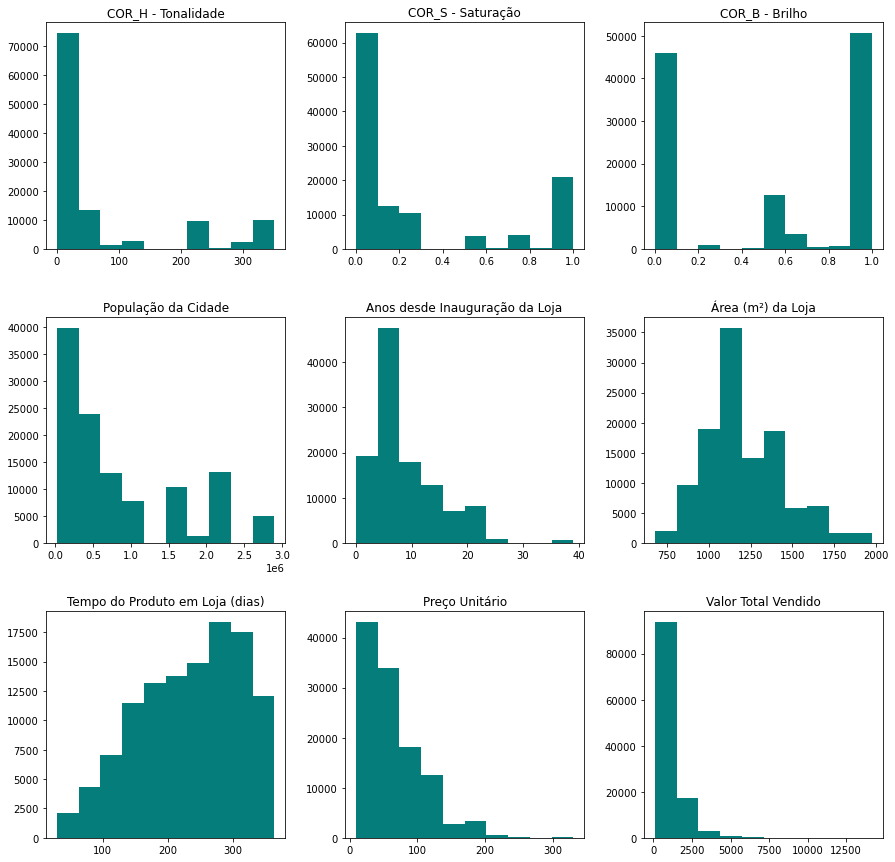

In [16]:
#Histogramas das colunas numéricas
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(331)
plt.hist(df2['COR_H'], color='#057D7A')
plt.title("COR_H - Tonalidade")

fig.add_subplot(332)
plt.hist(df2['COR_S'], color='#057D7A')
plt.title("COR_S - Saturação")

fig.add_subplot(333)
plt.hist(df2['COR_B'], color='#057D7A')
plt.title("COR_B - Brilho")

fig.add_subplot(334)
plt.hist(df2['POPULACAO'], color='#057D7A')
plt.title("População da Cidade")

fig.add_subplot(335)
plt.hist(df2['ANOS_DESDE_INAUG'], color='#057D7A')
plt.title("Anos desde Inauguração da Loja")

fig.add_subplot(336)
plt.hist(df2['AREA'], color='#057D7A')
plt.title("Área (m²) da Loja")

fig.add_subplot(337)
plt.hist(df2['TEMPO_EM_LOJA'], color='#057D7A')
plt.title("Tempo do Produto em Loja (dias)")

fig.add_subplot(338)
plt.hist(df2['PRECO_UNIT'], color='#057D7A')
plt.title("Preço Unitário")

fig.add_subplot(339)
plt.hist(df2['VALOR_TOTAL_VENDIDO'], color='#057D7A')
plt.title("Valor Total Vendido")

plt.subplots_adjust(wspace=0.25,hspace=0.3)

plt.show

In [17]:
#Descrição estatística das colunas categóricas
df2.describe(include=object)

,Tipo,Subtipo,Genero,Idade,MATERIAL_COR,MATERIAL_MARCA,REGIAO,Rua/Shopping,CLUSTER,TAMANHO_PE,Temp_loja,Cluster_low_high
count,114830,114830,114830,114830,114830,114830,114830,114830,114830,114830,114830,114830
unique,7,10,2,4,29,2,4,2,3,2,2,2
top,CHINELO,CASUAL,FEMININO,ADULTO,PRETO,PROPRIA,Norte,Shopping,A,GRANDE,Quente,High
freq,28769,46273,87078,104058,45852,67162,39137,73341,53134,70939,87647,67482


<function matplotlib.pyplot.show(close=None, block=None)>

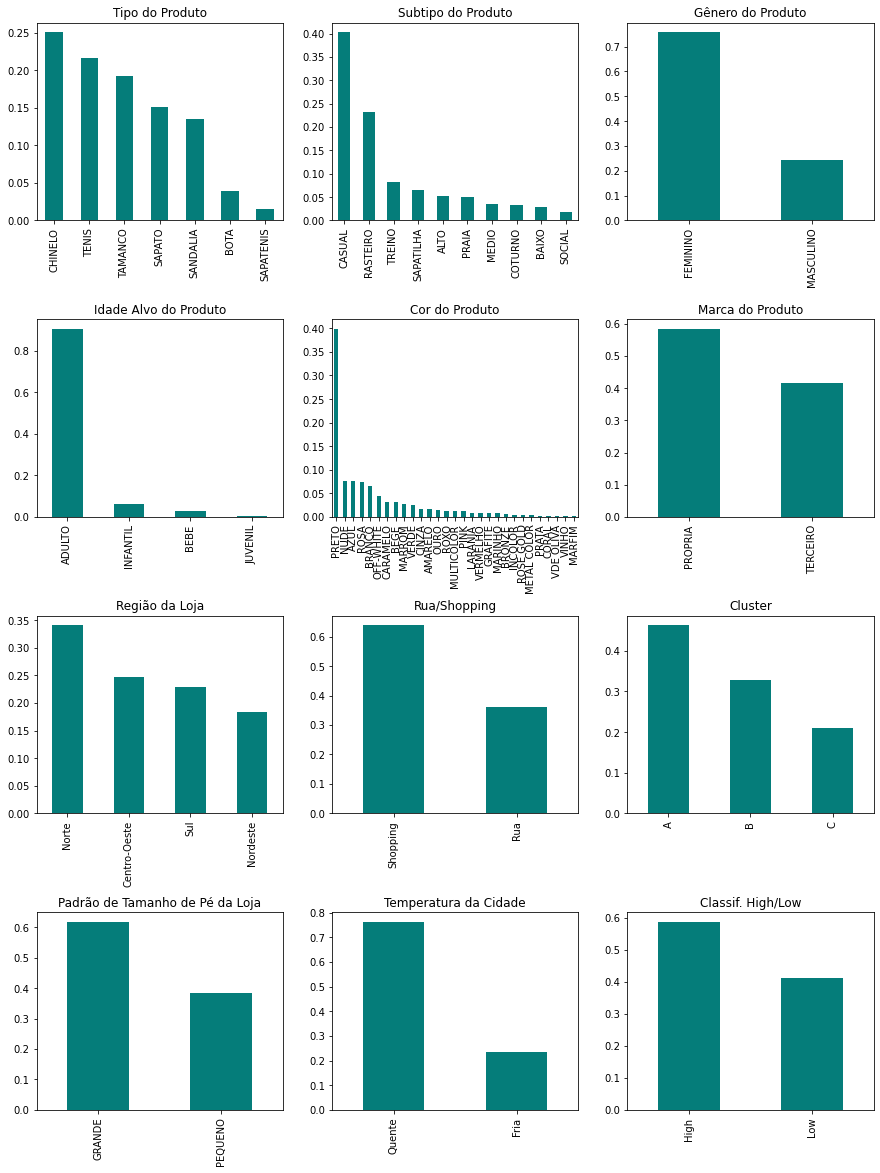

In [18]:
#Gráficos de barra com a frequência (%) das colunas categóricas
fig = plt.figure(figsize=(15, 20))

fig.add_subplot(431)
df2['Tipo'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Tipo do Produto")

fig.add_subplot(432)
df2['Subtipo'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Subtipo do Produto")

fig.add_subplot(433)
df2['Genero'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Gênero do Produto")

fig.add_subplot(434)
df2['Idade'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Idade Alvo do Produto")

fig.add_subplot(435)
df2['MATERIAL_COR'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Cor do Produto")

fig.add_subplot(436)
df2['MATERIAL_MARCA'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Marca do Produto")

fig.add_subplot(437)
df2['REGIAO'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Região da Loja")

fig.add_subplot(438)
df2['Rua/Shopping'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Rua/Shopping")

fig.add_subplot(439)
df2['CLUSTER'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Cluster")

fig.add_subplot(4,3,10)
df2['TAMANHO_PE'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Padrão de Tamanho de Pé da Loja")

fig.add_subplot(4,3,11)
df2['Temp_loja'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Temperatura da Cidade")

fig.add_subplot(4,3,12)
df2['Cluster_low_high'].value_counts(normalize=True).plot.bar(color='#057D7A')
plt.title("Classif. High/Low")

plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show

In [19]:
#Cálculo de correlação entre colunas (exceto categóricas nominais)
colunas = ["Genero","Idade","COR_H","COR_S","COR_B","MATERIAL_MARCA","Rua/Shopping","TAMANHO_PE",\
           "Temp_loja","Cluster_low_high","CLUSTER","POPULACAO","ANOS_DESDE_INAUG","AREA",\
           "TEMPO_EM_LOJA","PRECO_UNIT","VALOR_TOTAL_VENDIDO"]
df_corr = df2[colunas].copy()

#Transformação das colunas categóricas binárias e categóricas ordinais em valores numéricos
df_corr['Genero'] = df_corr['Genero'].map({'MASCULINO': 0, 'FEMININO': 1})
df_corr['Idade'] = df_corr['Idade'].map({'BEBE': 0, 'INFANTIL': 1, 'JUVENIL': 2, 'ADULTO': 3})
df_corr['MATERIAL_MARCA'] = df_corr['MATERIAL_MARCA'].map({'TERCEIRO': 0, 'PROPRIA': 1})
df_corr['Rua/Shopping'] = df_corr['Rua/Shopping'].map({'Rua': 0, 'Shopping': 1})
df_corr['TAMANHO_PE'] = df_corr['TAMANHO_PE'].map({'PEQUENO': 0, 'GRANDE': 1})
df_corr['Temp_loja'] = df_corr['Temp_loja'].map({'Fria': 0, 'Quente': 1})
df_corr['Cluster_low_high'] = df_corr['Cluster_low_high'].map({'Low': 0, 'High': 1})
df_corr['CLUSTER'] = df_corr['CLUSTER'].map({'C': 0, 'B': 1, 'A': 2})

corrMatrix = df_corr.corr().round(2)
print("Correleção em Relação ao Valor Total Vendido")
corrMatrix["VALOR_TOTAL_VENDIDO"]

Correleção em Relação ao Valor Total Vendido


Genero                -0.05
Idade                  0.14
COR_H                 -0.19
COR_S                 -0.23
COR_B                 -0.24
MATERIAL_MARCA        -0.16
Rua/Shopping           0.03
TAMANHO_PE             0.04
Temp_loja             -0.14
Cluster_low_high       0.09
CLUSTER                0.09
POPULACAO             -0.07
ANOS_DESDE_INAUG       0.01
AREA                   0.03
TEMPO_EM_LOJA          0.33
PRECO_UNIT             0.76
VALOR_TOTAL_VENDIDO    1.00
Name: VALOR_TOTAL_VENDIDO, dtype: float64